# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shubham Singh

EID: **ss96589**



# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a) Estimate of true values of y are centred around f(x) with a standard error of $\epsilon$.
Therefore f(x_0) is the best estimated value for this DATA(x,y) distribution at x_0.

$g(x_0|\theta)$ is the estimate of the function f(x) computed using the provided dataset.
$E_D[g(x_0)]$ represents expected value of that estimate computed over multiple datasets.
$$E[g(x_0)]-f(x_0)$$ suggests how much the average prediction value differs from the true regression value.
**Mathematically this term represents bias.**



b) From the previous answer, one can assume that if the model/computation of g(x) is not very complex then the variation of sample estimates, i.e. modelled on each sample datset, will be very low about the mean estimate, average of estimates/g(x) over multiple datsets.

For example if we use linear model or highly regularized model i.e. with all weights zero, then the estimate value will not vary much with different datasets.

But there is a high probability that the model estimate is very far from the optimal solution, expected conditional mean obtained from persumed population data.

$$ y(best__estimator)= E(true values|X) $$

On the contrary if the model is complex enough, trained without constraints on the entire training dataset sample, the it may be very close to the optimal solution/best_estimator. However, the estimate may vary significantly from one training datset to another.
This will lead to low bias but high variance error. 

Thus we need to strike the most favourable balance between bias and variance error using different techniques.
Thats why we use test datset to demarcate the zone where the model starts behaving in the biased manner by reduing bias error in lieu of increase in variance.



# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:




## Ans a

In [21]:
# !pwd
# pow(np.array([1,2,3]),2)
# np.array([1,2,3]).shape
# np.row_stack([np.array([1,2,3]),np.array([1,2,3])])
# np.random.rand(3,).reshape(-1,1)# 3- 3,1


In [22]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [23]:
# np.column_stack([x_train,pow(x_train,2)])
x_train.shape
# pow(np.array([1,2,3]),0.)

# pow(2,2)

(100,)

In [24]:
# poly_train[:,0]
# poly_model

Training MSE obtained from the polynomial model of degree 2 is 247.2967979737153
Test MSE obtained from the polynomial model of degree 2 is 320.0640834697786



Training MSE obtained from the polynomial model of degree 4 is 31.720018057290066
Test MSE obtained from the polynomial model of degree 4 is 31.292082886606696



Training MSE obtained from the polynomial model of degree 7 is 30.677193592109724
Test MSE obtained from the polynomial model of degree 7 is 33.41069407768904





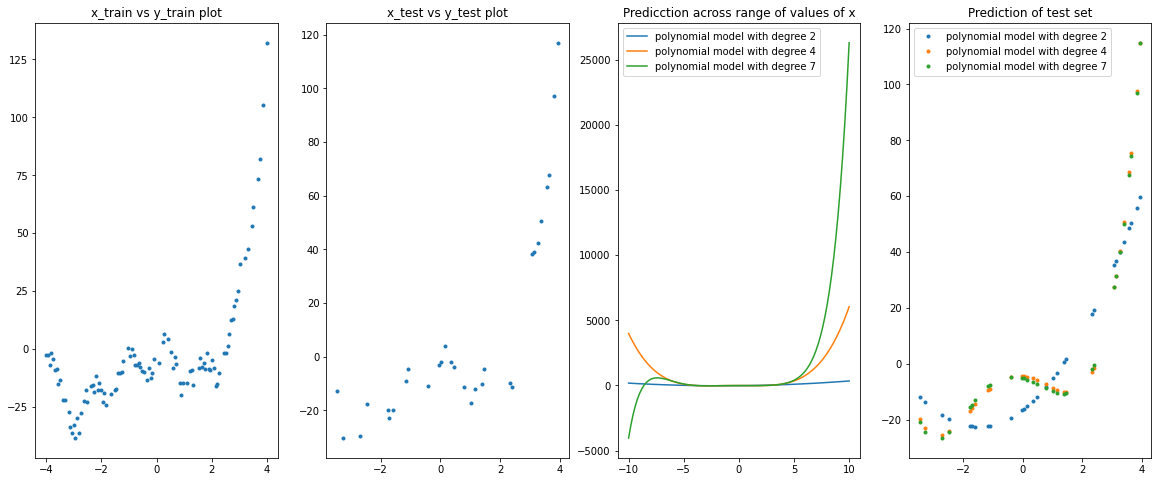

In [25]:
poly_model={}
T_err=[]
t_err=[]

# power=2
for power in [2,4,7]:
  poly_train=np.column_stack([pow(x_train,i) for i in range(power+1)])#datset creation

  temp_model=LinearRegression()
  temp_model.fit(poly_train,y_train)

  poly_test=np.column_stack([pow(x_test,i) for i in range(power+1)])#test datset transformation
  poly_model[power]=temp_model

  pred_train=temp_model.predict(poly_train)
  pred_test=temp_model.predict(poly_test)

  T_err.append(mean_squared_error(y_train,pred_train))
  t_err.append(mean_squared_error(y_test,pred_test))

  print('Training MSE obtained from the polynomial model of degree {} is {}'.format(power,mean_squared_error(y_train,pred_train)))
  print('Test MSE obtained from the polynomial model of degree {} is {}'.format(power,mean_squared_error(y_test,pred_test)))
  print('\n\n')


f,ax=plt.subplots(1,4,figsize=(20,8))

ax[0].plot(x_train,y_train,'.')
ax[0].set_title('x_train vs y_train plot')

ax[1].plot(x_test,y_test,'.')
ax[1].set_title('x_test vs y_test plot')


for k in poly_model.keys():
  temp_all=np.column_stack([pow(x_all,i) for i in range(k+1)])#transformed x_all
  ax[2].plot(x_all,poly_model[k].predict(temp_all),'-',label=f'polynomial model with degree {k}')
  ax[2].set_title('Predicction across range of values of x')
  ax[2].legend()

  temp_test=np.column_stack([pow(x_test,i) for i in range(k+1)])
  ax[3].plot(x_test,poly_model[k].predict(temp_test),'.',label=f'polynomial model with degree {k}')
  ax[3].set_title('Prediction of test set')
  ax[3].legend()




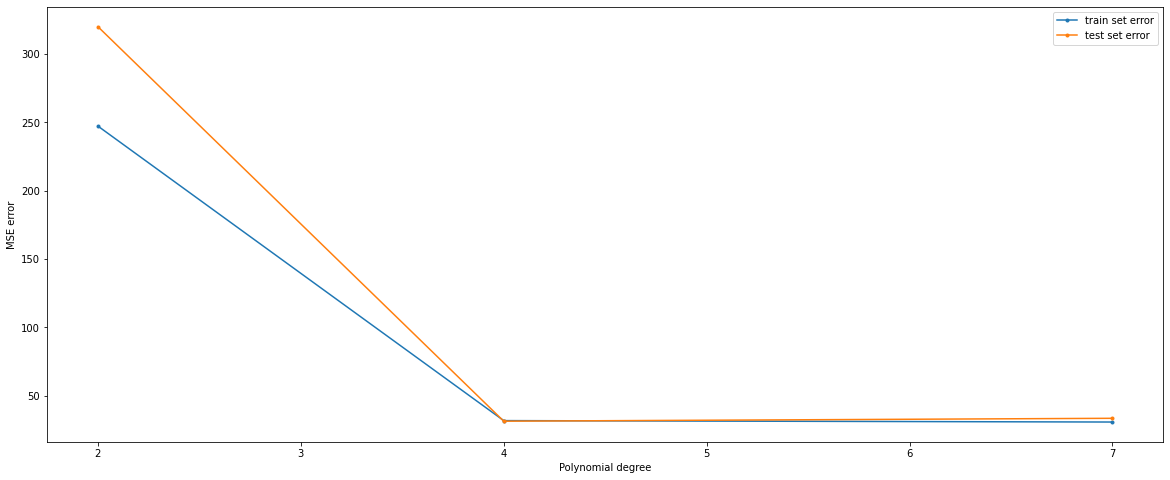

In [26]:

plt.figure(figsize=(20,8))
plt.plot([2,4,7],T_err,'.-',label='train set error')
plt.plot([2,4,7],t_err,'.-',label='test set error')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE error')

plt.legend()

## ANS b
The best model is the one that trains on 4th degree polynomial, this can be attributed to the low test datset error achieved.

The test datset error increases for the model trained on higher degree polynomial, i.e 7, possibly because of increase in variance error generated because of over fitting.
Poly model 4 seems to be the one where the model bias is low enough, additionally the variance across train and test datset does not shoot up till this degree of complexity.


The comlexity of 4 degree polynomial is able to learn the dataset thus reducing bias and at the very same time does not overlearn, hence maintain low variance error.

Whereas with the 7 degree polynomial the complexity of the model increases and it overlearn the training data, thus compromise on the variance of the model.
This can be visualized by observing slight increase in test set error.



## Ans c

In [28]:
def compute_train_test(x_train,y_train,power,x_test=x_test):  

  poly_train=np.column_stack([pow(x_train,i) for i in range(power+1)])#dataset creation

  temp_model=LinearRegression()
  temp_model.fit(poly_train,y_train)

  poly_test=np.column_stack([pow(x_test,i) for i in range(power+1)])#test datset transformation

  pred_train=temp_model.predict(poly_train)
  pred_test=temp_model.predict(poly_test)

  T_err=mean_squared_error(y_train,pred_train)
  t_err=mean_squared_error(y_test,pred_test)

  return (T_err,t_err)

In [29]:
import pandas as pd
train_dataset_size=[20,40,60,80,100]

lt_power=[2,4,7]

df_train=pd.DataFrame(index=train_dataset_size,columns=lt_power)
df_test=pd.DataFrame(index=train_dataset_size,columns=lt_power)

for sz in train_dataset_size:
  temp_x=x_train[:sz]
  temp_y=y_train[:sz]

  for p in lt_power:
    temp=compute_train_test(x_train=temp_x,y_train=temp_y,power=p)
    
    df_train.loc[sz,p]=temp[0]
    df_test.loc[sz,p]=temp[1]










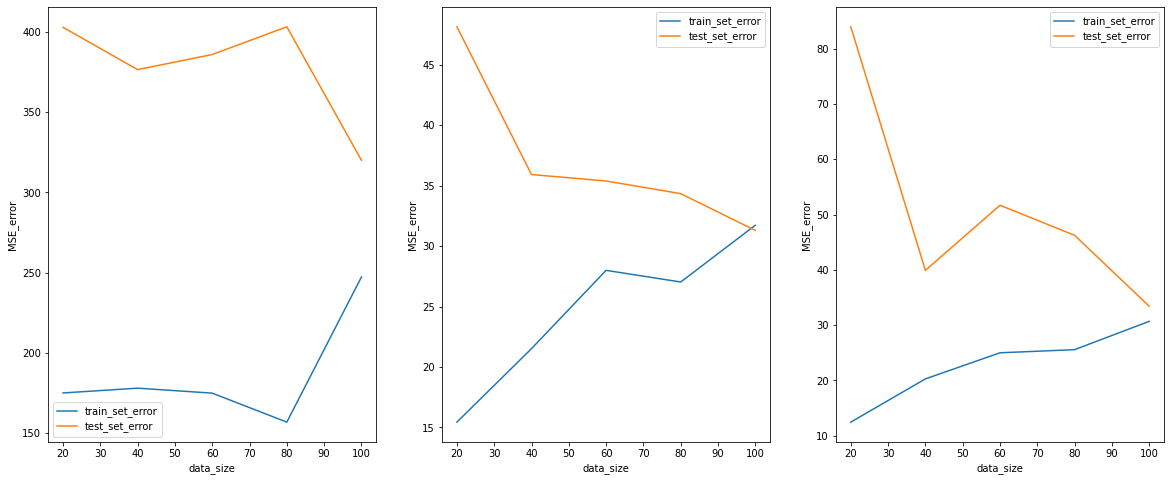

In [30]:
f,ax=plt.subplots(1,3,figsize=(20,8))

for i,p in enumerate(lt_power):
  df_train[p].plot(ax=ax[i],label='train_set_error')
  df_test[p].plot(ax=ax[i],label='test_set_error')

  ax[i].set_label(f'train and test error for {p} degree polynomial model')
  ax[i].set_xlabel('data_size')
  ax[i].set_ylabel('MSE_error')

  ax[i].legend()

## Answer:

1) When we have a small dataset, the training dataset MSE is very low and the test dataset MSE is very high indicating that there is a very low bias in the training data but there is a high variance and overfitting due to which test data MSE is very high.

2) For large datasets, we observe that the training dataset MSE has increased and the test dataset MSE has decreased which indicates that there is high bias (or the bias error has increased) and variance has decreased.

3) Also, when we go from 2nd degree polynomial to 4th degree polynomial, we find that both the training and the test datasets MSE has decreased indicating that a more complex (or higher degree) model better serves the purpose of prediction.


## Defining and running the plot_curves function as per the requirement of the Q

## Interpretation performed Above

In [31]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
  poly_model={}
  T_err=[]
  t_err=[]

  # power=2
  for power in [2,4,7]:
    poly_train=np.column_stack([pow(x_train,i) for i in range(power+1)])#datset creation

    temp_model=LinearRegression()
    temp_model.fit(poly_train,y_train)

    poly_test=np.column_stack([pow(x_test,i) for i in range(power+1)])#test datset transformation
    poly_model[power]=temp_model

    pred_train=temp_model.predict(poly_train)
    pred_test=temp_model.predict(poly_test)

    T_err.append(mean_squared_error(y_train,pred_train))
    t_err.append(mean_squared_error(y_test,pred_test))

    print('Training MSE obtained from the polynomial model of degree {} is {}'.format(power,mean_squared_error(y_train,pred_train)))
    print('Test MSE obtained from the polynomial model of degree {} is {}'.format(power,mean_squared_error(y_test,pred_test)))
    print('\n\n')


  f,ax=plt.subplots(1,4,figsize=(20,8))

  ax[0].plot(x_train,y_train,'.')
  ax[0].set_title('x_train vs y_train plot')

  ax[1].plot(x_test,y_test,'.')
  ax[1].set_title('x_test vs y_test plot')


  for k in poly_model.keys():
    temp_all=np.column_stack([pow(x_all,i) for i in range(k+1)])#transformed x_all
    ax[2].plot(x_all,poly_model[k].predict(temp_all),'-',label=f'polynomial model with degree {k}')
    ax[2].set_title('Predicction across range of values of x')
    ax[2].legend()

    temp_test=np.column_stack([pow(x_test,i) for i in range(k+1)])
    ax[3].plot(x_test,poly_model[k].predict(temp_test),'.',label=f'polynomial model with degree {k}')
    ax[3].set_title('Prediction of test set')
    ax[3].legend()

  print("IMPLEMENT ME!")
  plt.show()
  return [0, 0, 0], [0, 0, 0]

Training MSE obtained from the polynomial model of degree 2 is 247.2967979737153
Test MSE obtained from the polynomial model of degree 2 is 320.0640834697786



Training MSE obtained from the polynomial model of degree 4 is 31.720018057290066
Test MSE obtained from the polynomial model of degree 4 is 31.292082886606696



Training MSE obtained from the polynomial model of degree 7 is 30.677193592109724
Test MSE obtained from the polynomial model of degree 7 is 33.41069407768904



IMPLEMENT ME!


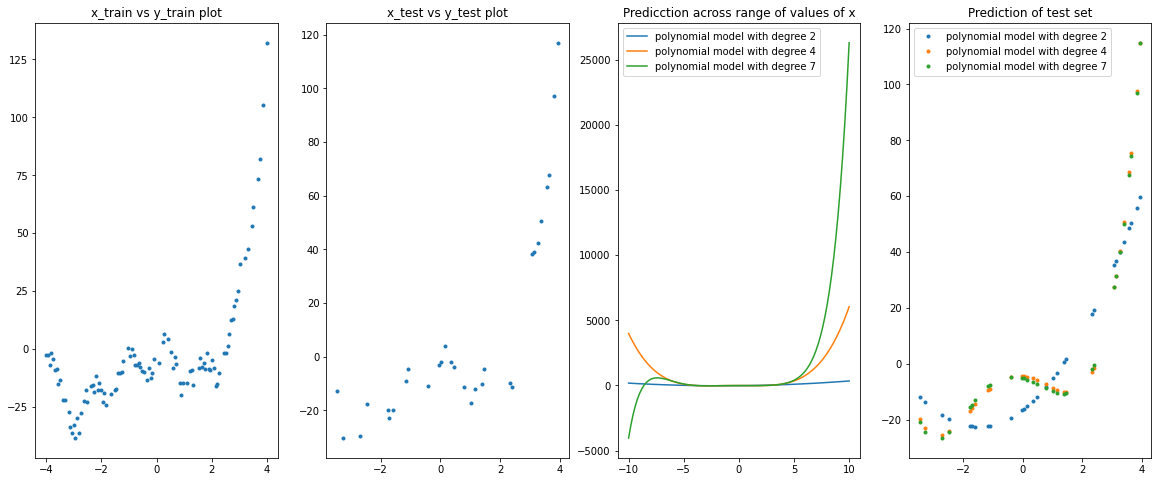

In [32]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

20% data
Training MSE obtained from the polynomial model of degree 2 is 161.17147378830037
Test MSE obtained from the polynomial model of degree 2 is 402.3231269099287



Training MSE obtained from the polynomial model of degree 4 is 35.1151131391298
Test MSE obtained from the polynomial model of degree 4 is 38.34074498344301



Training MSE obtained from the polynomial model of degree 7 is 22.54394669137331
Test MSE obtained from the polynomial model of degree 7 is 135.20764526757628



IMPLEMENT ME!


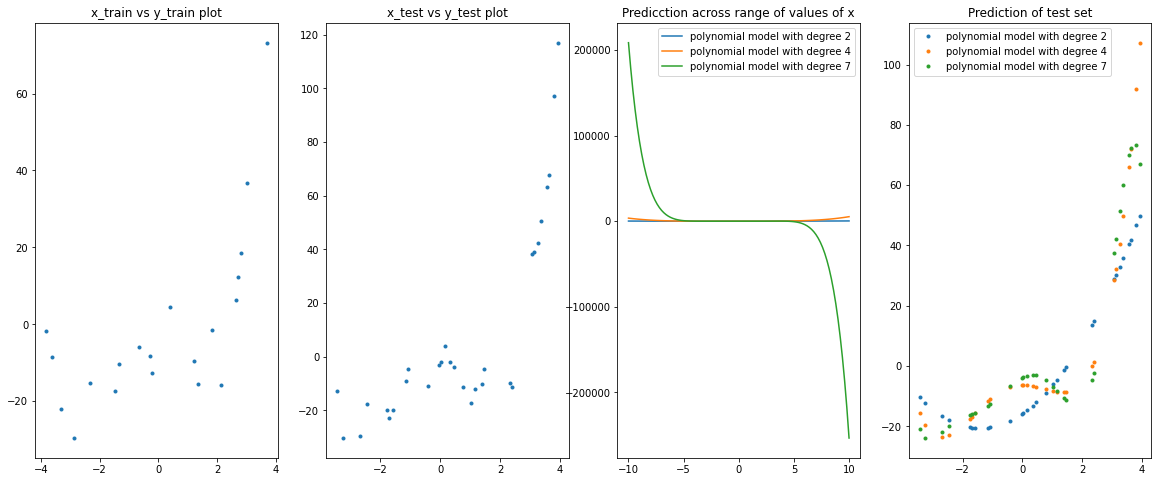

In [33]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)

40% data
Training MSE obtained from the polynomial model of degree 2 is 150.33251286085704
Test MSE obtained from the polynomial model of degree 2 is 405.8051669616578



Training MSE obtained from the polynomial model of degree 4 is 31.624529646446906
Test MSE obtained from the polynomial model of degree 4 is 33.16428295918732



Training MSE obtained from the polynomial model of degree 7 is 25.492718751653644
Test MSE obtained from the polynomial model of degree 7 is 61.23741884555871



IMPLEMENT ME!


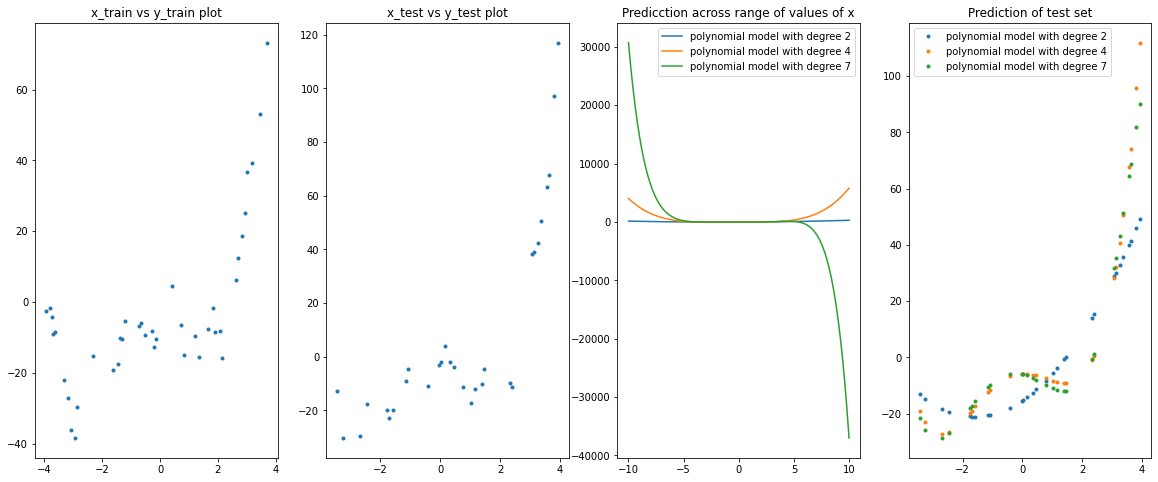

In [34]:
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)

60% data
Training MSE obtained from the polynomial model of degree 2 is 150.08383759141728
Test MSE obtained from the polynomial model of degree 2 is 403.2513784833408



Training MSE obtained from the polynomial model of degree 4 is 29.192805739947904
Test MSE obtained from the polynomial model of degree 4 is 31.78141541619669



Training MSE obtained from the polynomial model of degree 7 is 26.099088642454422
Test MSE obtained from the polynomial model of degree 7 is 60.166672376597454



IMPLEMENT ME!


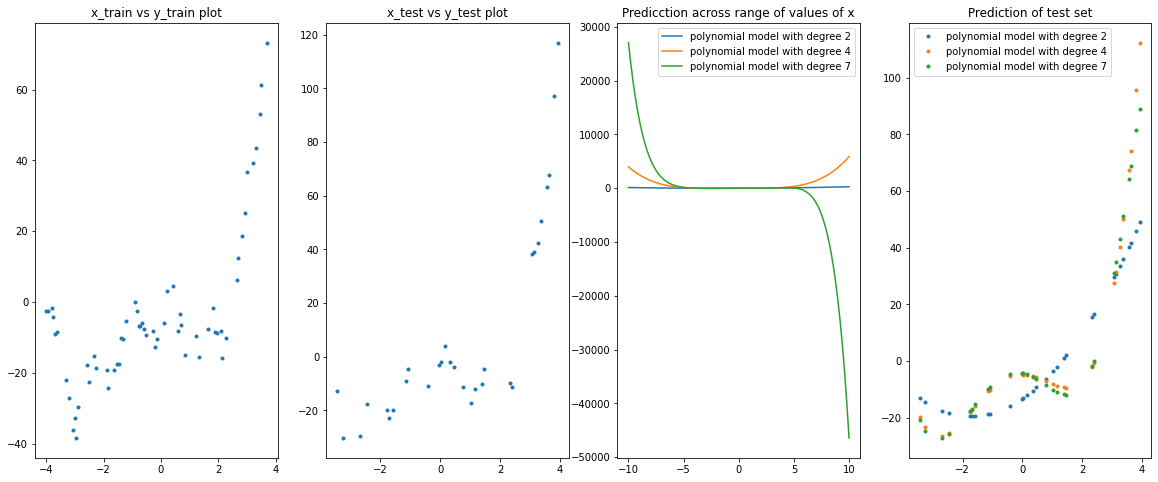

In [35]:
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)

80% data
Training MSE obtained from the polynomial model of degree 2 is 168.11882461502813
Test MSE obtained from the polynomial model of degree 2 is 407.5936968818475



Training MSE obtained from the polynomial model of degree 4 is 29.305108483323448
Test MSE obtained from the polynomial model of degree 4 is 32.51810686874254



Training MSE obtained from the polynomial model of degree 7 is 26.549129596283638
Test MSE obtained from the polynomial model of degree 7 is 48.076935297103574



IMPLEMENT ME!


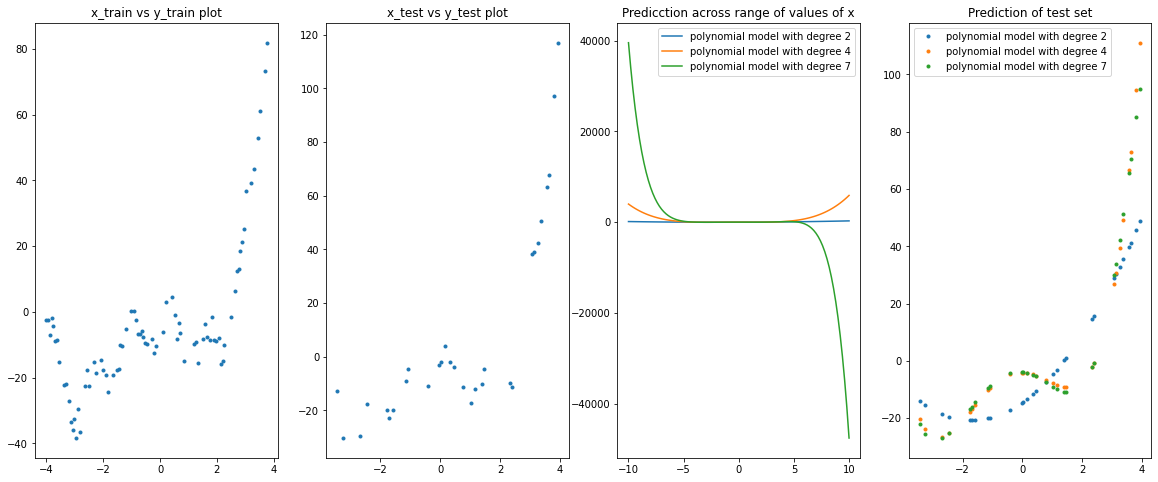

In [36]:
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)

100% data
Training MSE obtained from the polynomial model of degree 2 is 247.2967979737153
Test MSE obtained from the polynomial model of degree 2 is 320.0640834697786



Training MSE obtained from the polynomial model of degree 4 is 31.720018057290066
Test MSE obtained from the polynomial model of degree 4 is 31.292082886606696



Training MSE obtained from the polynomial model of degree 7 is 30.677193592109724
Test MSE obtained from the polynomial model of degree 7 is 33.41069407768904



IMPLEMENT ME!


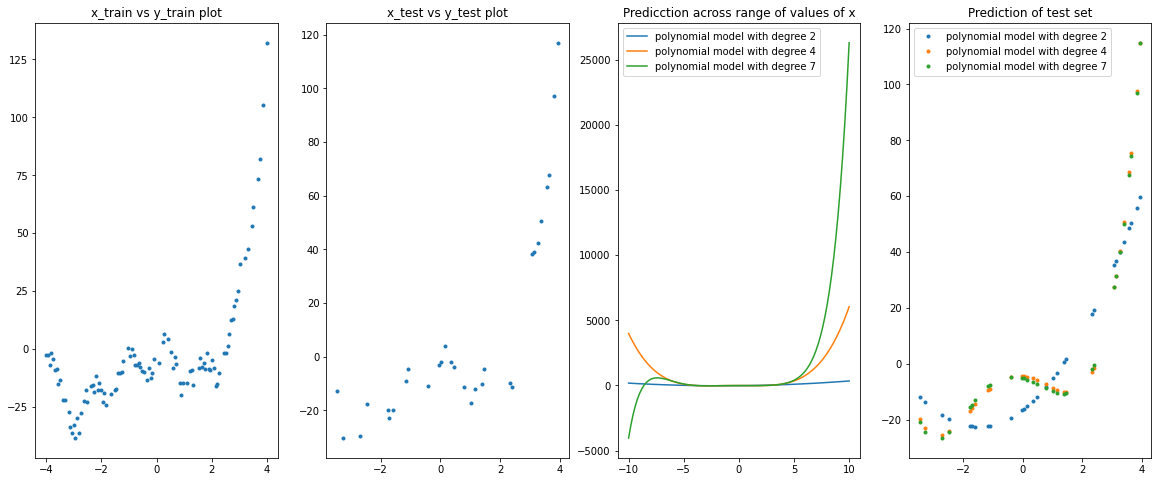

In [37]:
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:



Ans a)

**Advantages of SGD-**
It is computationally faster because the gradient is obtained for a single data point and approximated over a number of iterations instead of calculating for the entire dataset. It avoids local minima because the update of weights are done at every data point which increases the possibility to dodge local minima/s of a non-convex function.
It can be applied to adaptive experiments where the flow of input data is throughout the time. The **disadvantage of SGD** is that the Solution may oscillate highly and many number of epochs may be required to generate stable solution.
**Advantages of GD-**
It performs optimization by learning on the entire dataset at once. It can be used in places where the first derivate of the loss function is easy to compute. It provides with stable solutions as the update is performed on the entire batch at once. The **disadvantage of GD** is that it is computationally slower when there are large datasets because the gradient is calculated for the entire dataset at once. GD is not able to detect the duplicacy of the dataset, it may take average loss on the basis of entire datset including the duplicate values.

Ans b)

Nelder-Mead method is a form of direct search method that employs simple prototype (shapes) based technique in order to optimize a function.

It iteratively computes a loss function and compare it to the previous loss function value/s and determine the direction in which one can find optimal point, maxima/minima, of a function. Nelder mead uses principles of contraction and expansion to adjust the length of each step. This way the process advances faster when the point value is in the direction of the optimal value by using the expansion rules. Additionaly, the contraction rate helps to remain in the viscinity of the optimal point by contracting the step size, when the new point value points in direction away from the optimal point.

The iteration is carried out till the stop crieterion is reached which is either number of iterations before termination or reaching an optimal value where the statistic of all points on the shape/prototype that is used in nelder method is below some specified threshold.



**Disadvantages of Nelder-Mead method**-

For higher dimension data the computational complexity of this method increases significantly. 
The drop across each dimension needs to be computed and compared. 
Further everytime, each movement only takes place along single direction and other computation of gradients are not even used.

If the right combination of contraction and expansion are not chosen, then significantly high number of iterations will be required to find global optimal value. There is a possibility that one may land up in a local minima/maxima and never get away from the zone.









# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer: 4

The model seems to be a linear combination of mixed types of terms, that is both linear and non linear terms.

We can make use of transformation matrix in order to moderate down the complexity of our computation.

The raw/original data comprises of two primary columns.
We need to create three features from this raw dataset additionaly add a bias term to our final model equation.

In conclusion we need to apply four set of transformation to our original matrix, following perform stochastic gradient descent to estimate the coefficients of this predefined linear model.



---
Original dataset has a shape of n*2 where n is the number of sample points.

transformation can be carried out is steps where we multiply/apply [1,1,1,np.exp()] on[1,x1i,x1ix2i,-x1i]

$$phi=Transformed Matrix=[[1,x1_{i},x1_{i}*x2_{i},e^{-x1_{i}}]...ntimes]$$


Finally we will be having a n*4 matrix comprising of constant term, x1 term, product of x1 and x2 and exponential of -x1


We need to determine four weights in order to estimate this linear model.



---

In line with principle of MLE , we will try to reduce the error/residual of our predicted values, in order to determine the weights.

The formula for MSE loss is given by sum of sqzures of difference between the true value and the estimated value.

$$yest_{i}= w0 +w1*x1_{i} +w2*x1_{i}*x2_{i} + w3*e^{-x1_{i}} $$
$$ L=loss = summation_{0-n}[(ytrue_{i}-yest_{i})^{2}] $$

We will have to minimize this loss in order to find the optimal estimates of our 4 coefficients.

Gradient Descent, in line with assumption from Taylor series, directs to approach in direction of negative gradient of the function in order to find the minimum of the function.

Here comes the divergence, where we can either take the entire batch size of data and compute the sum of gradients wrt to each variable/coefficient, or take gradient at each data point and sequentially update the weights/coefficients at each data point.

Stochastic gradient descent directs to follow the later step where we reduce the gradient from coefficients at each data point.

As we have four different weights, we will need to compute four gradient functions with respect to each weight.
$$ dL/dw0= 2*(ytrue_{i}-yest_{i})*(-1)*(dyest_{i}/dw0) $$
$$dyest_{i}/dw0= 1$$
therefore
$$ dL/dw0= -2*(ytrue_{i}-yest_{i})*(1) $$

Similary

$$ dL/dw1= -2*(ytrue_{i}-yest_{i})*(x1_{i}) $$
$$ dL/dw2= -2*(ytrue_{i}-yest_{i})*(x1_{i}*x2_{i}) $$
$$ dL/dw3= -2*(ytrue_{i}-yest_{i})*(e^{-x1_{i}}) $$


If
$$L1_{i}=(ytrue_{i}-yest_{i})$$

then gradient at any sample point i
$$ Jacobian_{i} =[dL_{i}/dw0,dL_{i}/dw1,dL_{i}/dw2,dL_{i}/dw3]= -2*L1_{i}*phi_{i}$$
where phi is the transformed matrix

As we have n data points we need to sequantially update our coeffiecinets by subtracting the gradient at each sample point.

We need an initial values of our four coefficients that we can chose randomly, assuming our loss function is convex, therefore any choice of initial point will lead us to global minima.

Let
$$ w0_{est},w1_{est},w2_{est},w3_{est}$$ 
be our randomly chosen initial guesses for the coefficient of the model

W=[w0_{0},w1_{0},w2_{0},w3_{0}]

SGD expects to compute the gradient of the loss following update our coefficient value at each sample point.

In order to not overdetermine at every data point SGD multiplies the reducing gradient with a **Learning rate parameter- alpha**.

The overall equation reads as 

for i in range(1 to n+1){
W= W- (-2*L1_{i}*phi_{i})
}

which is a vectorized form of 

for i in range(1 to n+1){ Across datset
  $$
w0_{est}=w0_{est}-(-2*(ytrue_{i}-yest_{i})*(1)*alpha)$$
$$
w1_{est}=w1_{est}-(-2*(ytrue_{i}-yest_{i})*(x1_{i})*alpha)$$

$$
w2_{est}=w2_{est}-(-2*(ytrue_{i}-yest_{i})*(x1_{i}*x2_{i})*alpha)$$

$$
w3_{est}=w3_{est}-(-2*(ytrue_{i}-yest_{i})*(e^{-x1_{i}})*alpha)
$$
}


There are some added nuances, one of them is like for compensating the lower values of learning rate, the learning across the entire dataset is caried out multiple number of times, each iteration of learning is known as epoch.

**We perform this learning across datset for e number of epochs**

*for epoch in range(0,e){Iterated e number of times*

  *for i in range(1 to n+1){ Across datset*

  $$
  w0_{est}=w0_{est}-(-2*(ytrue_{i}-yest_{i})*(1)*alpha)$$
  $$
  w1_{est}=w1_{est}-(-2*(ytrue_{i}-yest_{i})*(x1_{i})*alpha)$$

  $$
  w2_{est}=w2_{est}-(-2*(ytrue_{i}-yest_{i})*(x1_{i}*x2_{i})*alpha)$$

  $$
  w3_{est}=w3_{est}-(-2*(ytrue_{i}-yest_{i})*(e^{-x1_{i}})*alpha)
  $$
}}








# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [ ]:
xx=np.random.random(size=(10,4))
xx[1,:]@np.random.random((4,))

0.5781277286931776

In [ ]:
# temp=np.random.random(size=(X.shape[1])) 
# print(temp)
# temp += 1
# temp

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef=[None]
        
    def sgd(self, gradient):
        self.coef -= self.learning_rate*gradient # = please put your codes here to update the self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)

        self.coef=np.random.random(size=(X.shape[1]))
        # self.coef=np.zeros(shape=(X.shape[1]))

        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):

              y_pred=X[i,:]@self.coef
              loss1=y[i] - y_pred
              loss2=self.regularization*sum(pow(self.coef,2))
              loss=loss1+loss2

              gradient= -1*loss1*X[i,:] + 1*self.regularization*self.coef[:] #derivative of mse wrt w's, removed multiplier/2 for consistency with the question purposes 
              

                # Update weights
              self.sgd(gradient)
              # print(self.coef)
            
            # print(self.coef)
            # print(gradient)
            temp_coef=copy.copy(self.coef) 
            coefs.append(temp_coef)
            self.wt=coefs
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.mse=mse[-1]

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X


      temp_X=self.get_features(X)
      if all(self.coef):
        return temp_X@self.coef
      
      self.coef=np.random.random(size=(temp_X.shape[1]))
      return temp_X@self.coef
      


## Ans a

In [ ]:
data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]



df_err=pd.DataFrame(index=learning_rate,columns=regularization)

for lr in learning_rate:
  for r in regularization:

    temp_mod=Regression(lr,r,15)
    temp_mod.fit(X,y)
    df_err.loc[lr,r]=temp_mod.mse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:

In [ ]:
df_err#.T.fillna(1000).idxmin().idxmin()



,0,10,100
0.0001,0.0347633,0.0553663,0.0635476
0.0010,0.0454218,0.0553622,0.0634485
0.0100,0.0615967,0.0542691,0.063519
0.1000,0.0776771,0.0557825,NaN
1.0000,inf,NaN,NaN
10.0000,NaN,NaN,NaN
100.0000,NaN,NaN,NaN


The lowest MSE is obtained for a regularization value of 0 and learning rate of 0.0001
The second lowest MSE is obtained for regularization value of 0 and learning rate of 0.001

For learning rates larger than 0.1, the model turns unstable and the values of the updated weights shoots up and down unboundedly out of range.
This occurs even when the regularization values are high, the weights change their signs but magnitude of the updated weights changes in an ustaedy manner.

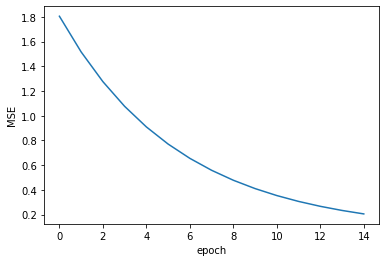

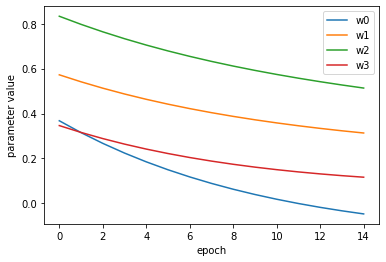

In [ ]:
mod_1=Regression(0.0001,0,15)## High leraning rate is ceating instability


# # mod_1.linearPredict(X)
mod_1.fit(X,y,plot=True)
# mod_1.mse


# plt.plot(mod_1.coef[:,1])

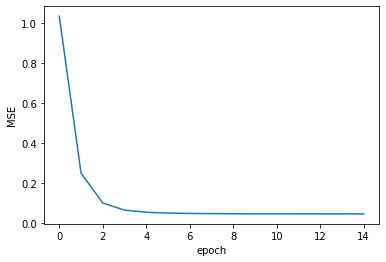

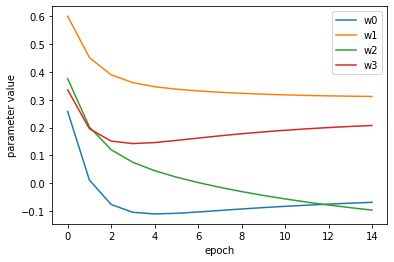

In [ ]:
# mod_1.wt
mod_2=Regression(0.001,0,15)## High leraning rate is ceating instability


# # mod_1.linearPredict(X)
mod_2.fit(X,y,plot=True)
# mod_2.mse


# plt.plot(mod_1.coef[:,1])

## Ans b 
MSE reported for two best combinations of learning rate and regularization is as follow

1) Regularization=0, Learning rate=0.0001, Training MSE=0.035

2) Regularization=0, Learning rate=0.001, MSE=0.045


## Rough Space
Please ignore 

In [ ]:
# all([None])

In [ ]:
# all(np.array([1,2]))

In [ ]:
# class checker():
#   def __init__(self,iterations=10):
#     self.itr=iterations
#     self.num=0

#   def do(self,n):
#     self.num += n

#   def do_1(self,var):
#     temp_lt=[]
#     for _ in range(self.itr):
#       self.do(var)
#       print(self.num)
#       temp_lt.append(self.num)
    
#     self.chk=temp_lt







In [ ]:
# # cc=checker()

# cc.do_1(1)
# c.chk